# **Telecom X – Prevendo Churn( Evasão) de Clientes**

## 🗂️ Sumário

1. [Introdução](#introducao)
2. [Preparação do Ambiente](#preparacao)
3. [Carregamento e Análise Inicial dos Dados](#carregamento)
4. [Exploração de Dados (EDA)](#eda)
5. [Pré-processamento e Tratamento dos Dados](#preprocessamento)
6. [Balanceamento das Classes](#balanceamento)
7. [Modelagem Preditiva](#modelagem)
8. [Avaliação de Modelos](#avaliacao)
9. [Interpretação e Explicabilidade](#interpretacao)
10. [Exportação de Resultados e Salvamento de Modelos](#exportacao)
11. [Conclusão e Recomendações](#conclusao)

## 1. <a name="introducao"></a> Introdução

### 🎯 Missão
Desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

### 🧠 Objetivos do Desafio
Preparar os dados para a modelagem (tratamento, encoding, normalização).

Realizar análise de correlação e seleção de variáveis.

Treinar dois ou mais modelos de classificação.

Avaliar o desempenho dos modelos com métricas.

Interpretar os resultados, incluindo a importância das variáveis.

Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

### 🧰 O que você vai praticar
- ✅ Pré-processamento de dados para Machine Learning
-✅ Construção e avaliação de modelos preditivos
-✅ Interpretação dos resultados e entrega de insights
-✅ Comunicação técnica com foco estratégico

## 2. <a name="preparacao"></a> Preparação do Ambiente

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    f1_score, recall_score, precision_score, roc_curve, roc_auc_score, precision_recall_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

import shap
import pickle
import warnings
warnings.filterwarnings('ignore')

## 3. <a name="carregamento"></a> Carregamento e Análise Inicial dos Dados

In [47]:
df = pd.read_csv('telecomX_dados_tratados.csv')

# Visualizações iniciais
display(df.sample(5))
display(df.describe())
display(df.info())
display(df.isnull().sum())

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,contas_diarias
3443,4770-UEZOX,0,1,0,0,0,2,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Electronic check,74.75,144.80,2.491667
3771,5176-LDKUH,0,0,0,0,0,48,1,0,Fiber optic,...,0,0,0,0,One year,0,Electronic check,75.15,3772.65,2.505000
1080,1527-SXDPN,1,1,0,1,1,52,1,1,Fiber optic,...,1,1,0,1,Two year,1,Bank transfer (automatic),96.25,4990.25,3.208333
369,0530-IJVDB,0,1,0,0,1,70,1,1,Fiber optic,...,1,1,1,1,Two year,1,Electronic check,114.60,7882.50,3.820000
6752,9308-ANMVE,0,1,0,0,1,47,1,0,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,55.30,2654.05,1.843333


,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges.monthly,charges.total,contas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2279.287581,2.157337
std,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2267.178963,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,401.400000,1.180833
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   int64  
 2   gender            7267 non-null   int64  
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   int64  
 5   dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   int64  
 8   multiplelines     7267 non-null   int64  
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   int64  
 11  onlinebackup      7267 non-null   int64  
 12  deviceprotection  7267 non-null   int64  
 13  techsupport       7267 non-null   int64  
 14  streamingtv       7267 non-null   int64  
 15  streamingmovies   7267 non-null   int64  
 16  contract          7267 non-null   object 


None

,0
customerid,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0


## 4. <a name="eda"></a> Exploração de Dados (EDA)

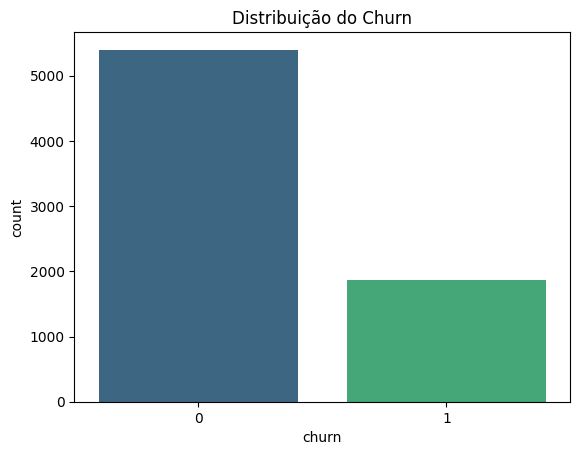

churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


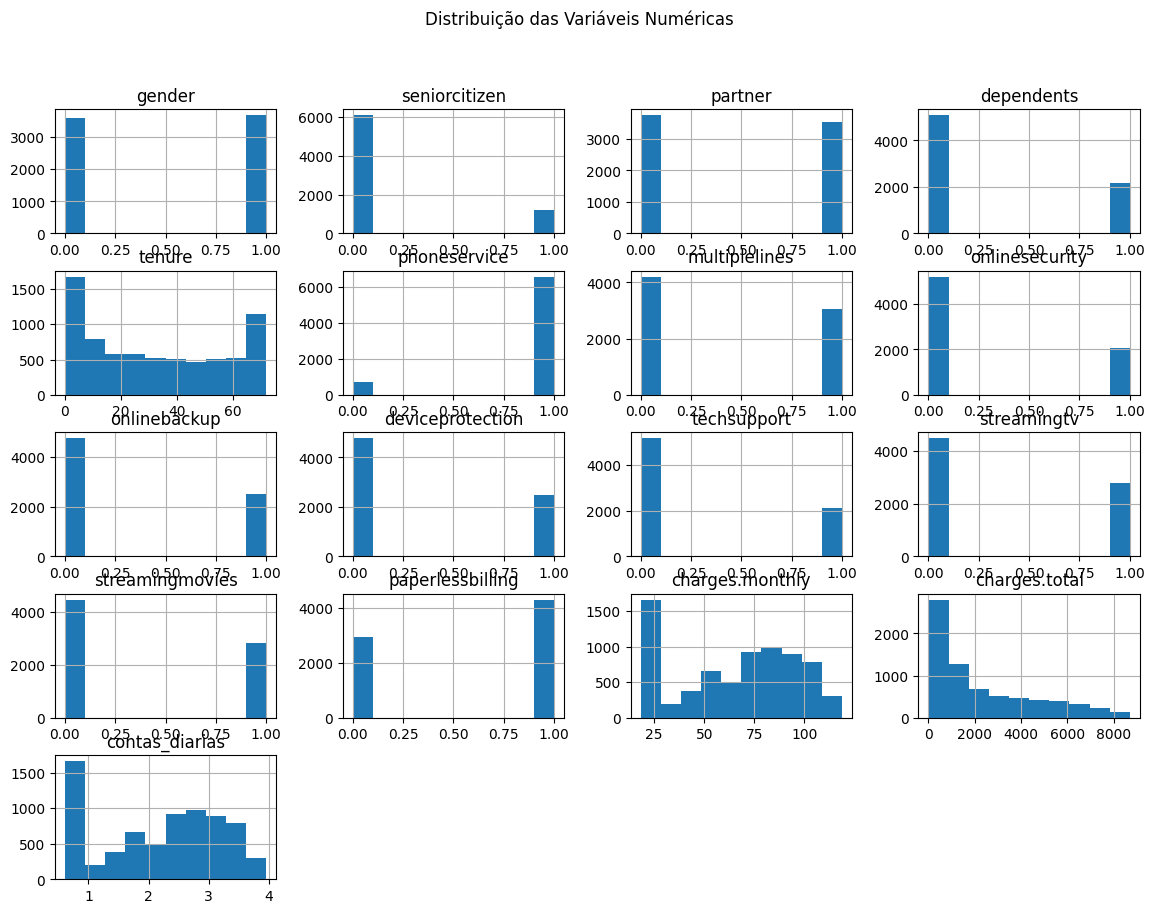

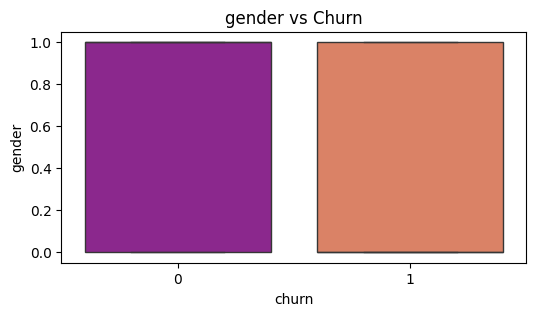

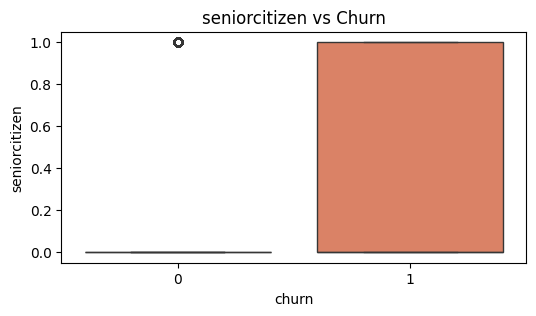

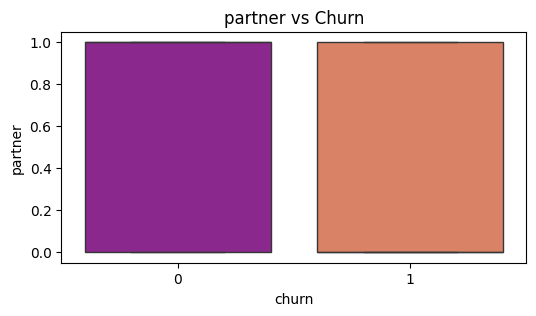

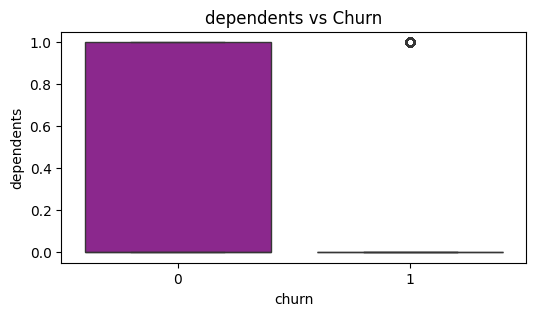

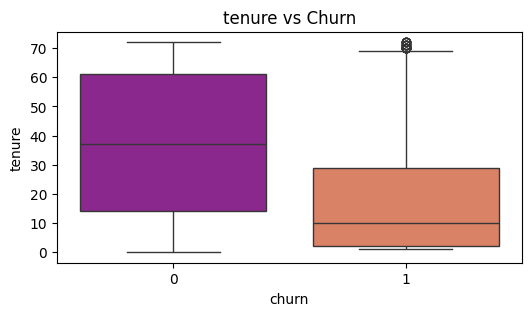

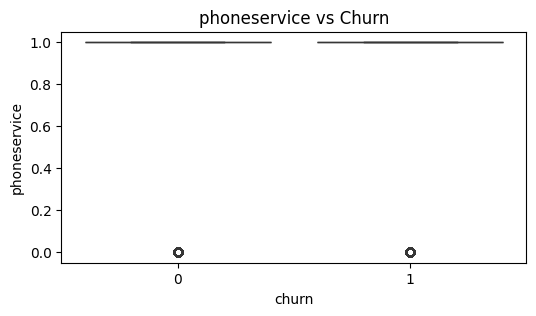

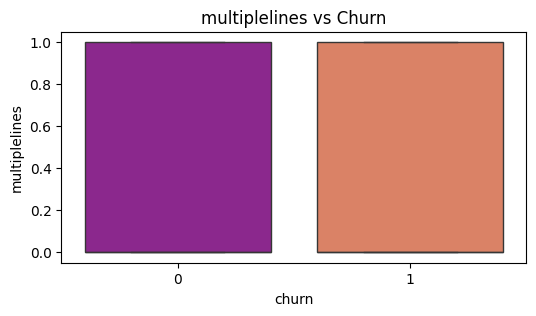

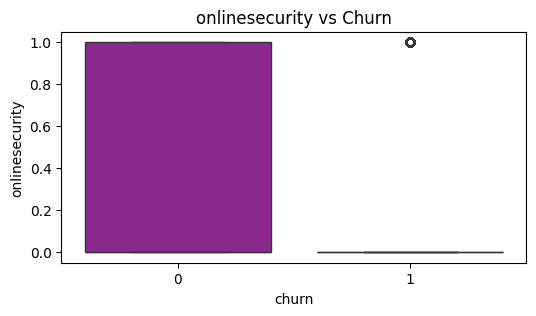

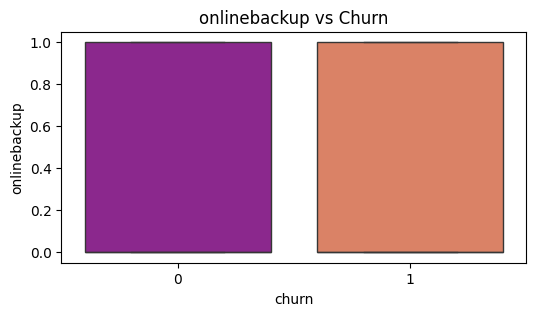

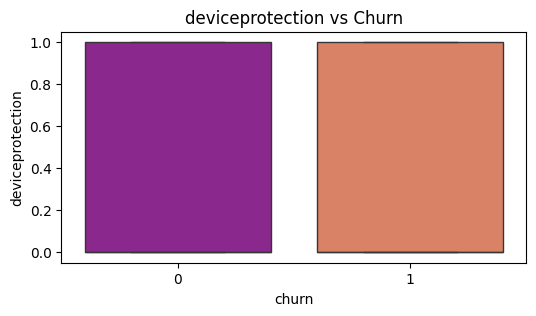

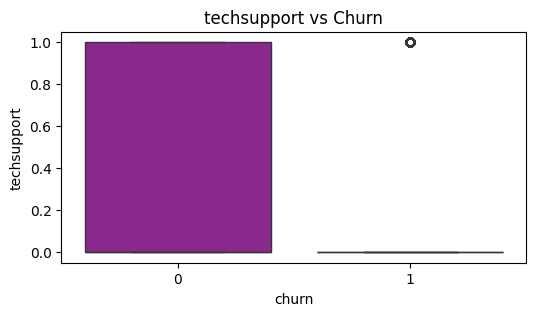

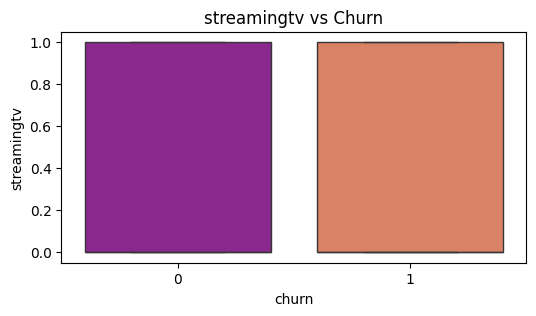

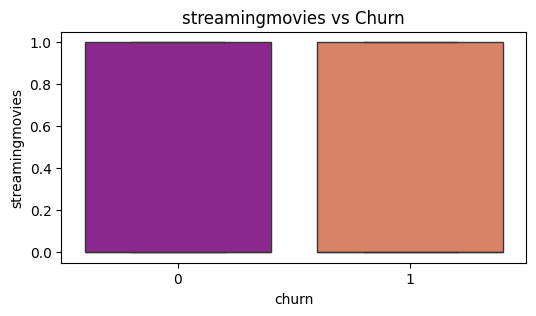

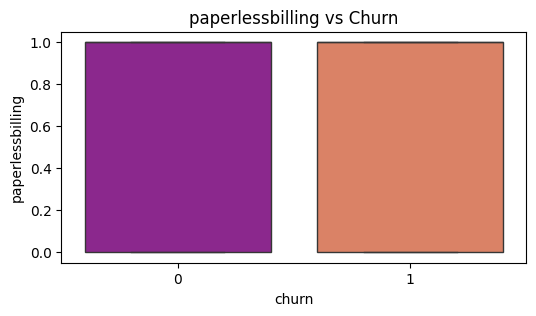

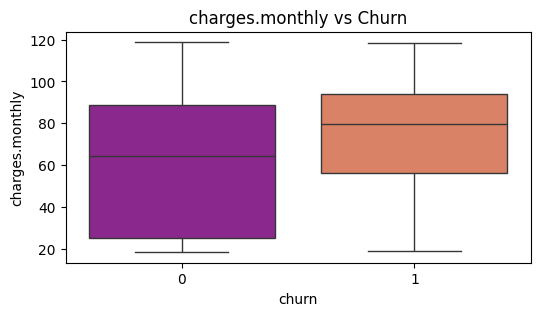

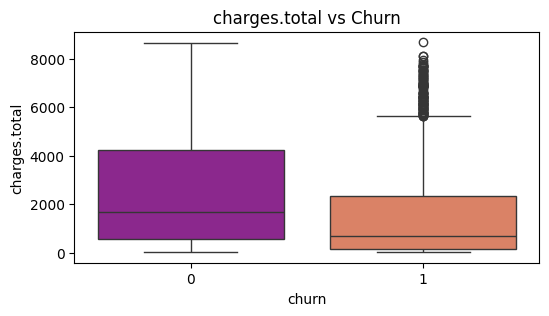

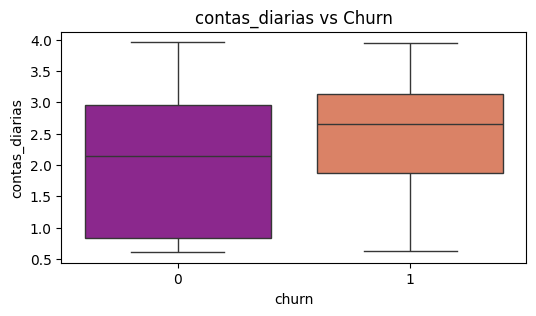

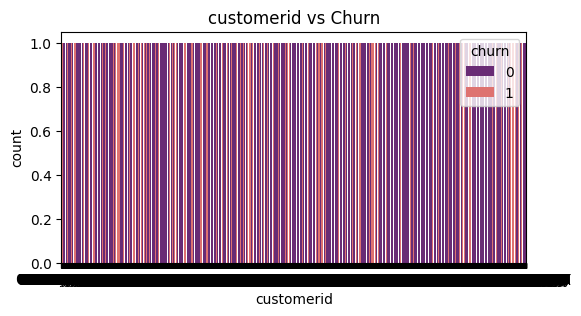

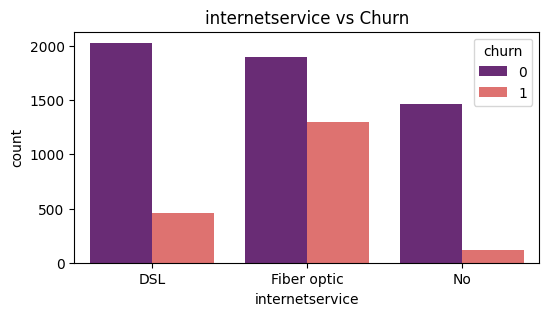

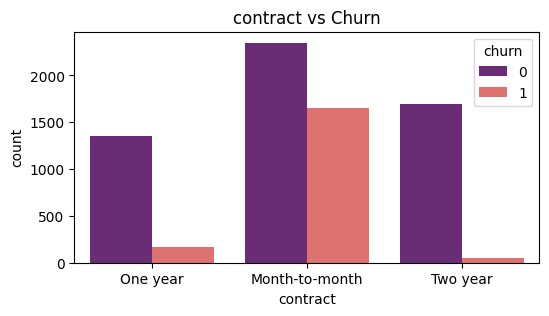

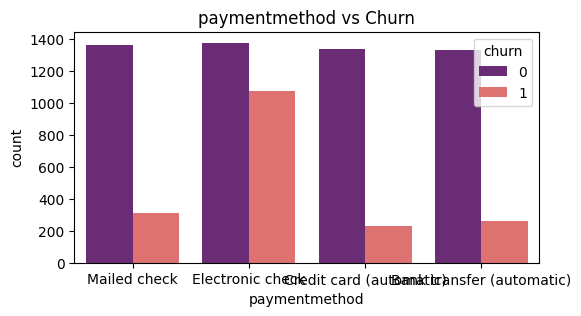

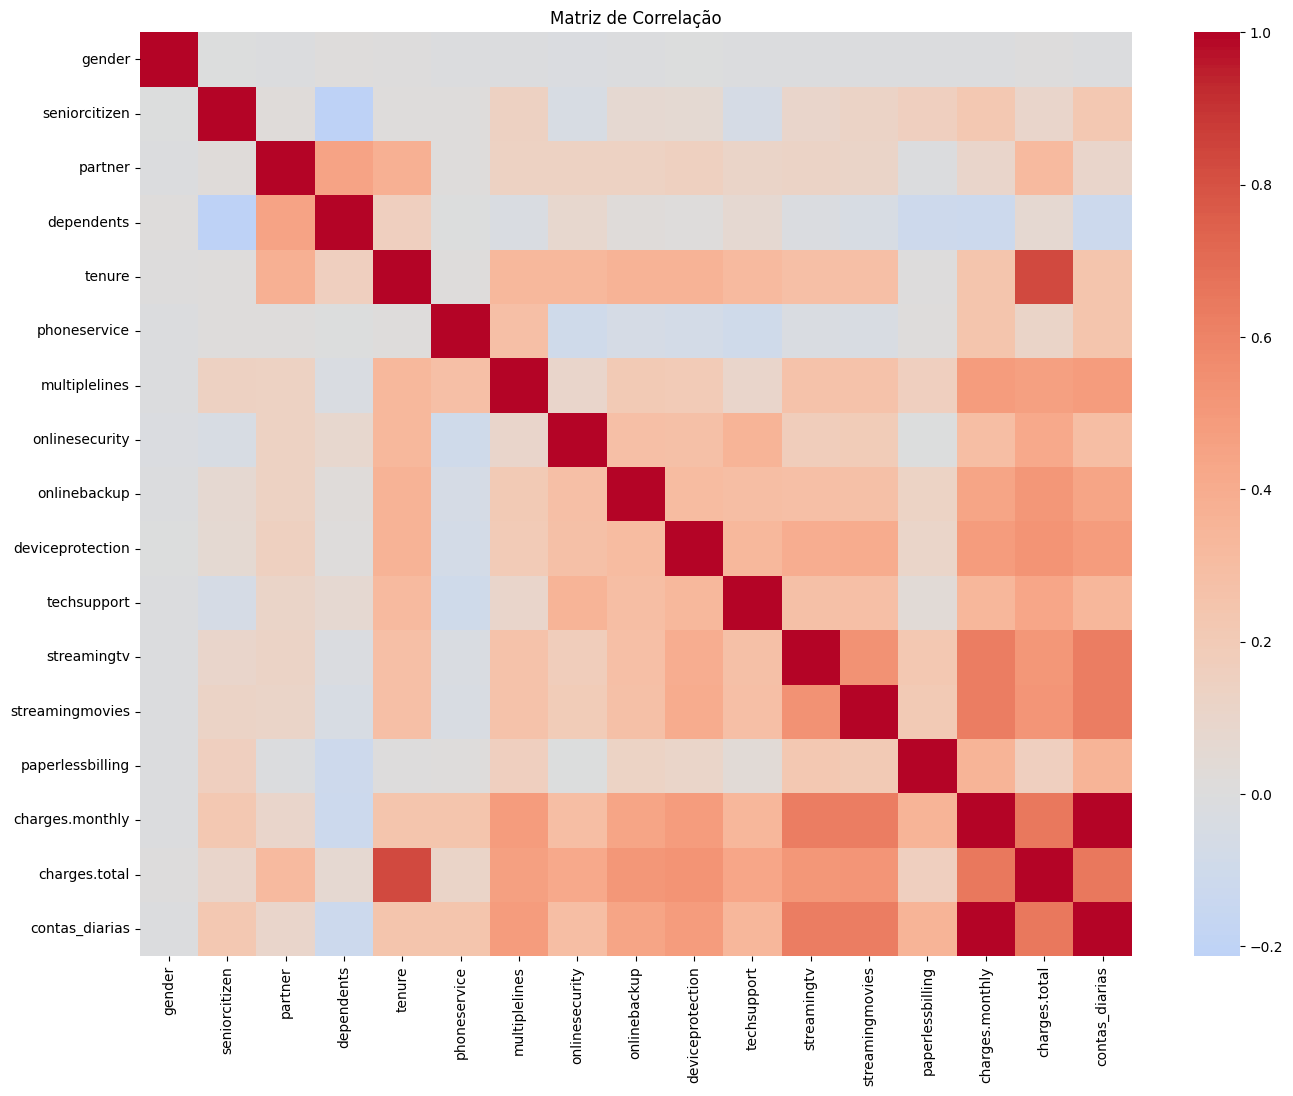

In [48]:
# Distribuição da variável alvo
sns.countplot(x='churn', data=df, palette='viridis')
plt.title('Distribuição do Churn')
plt.show()

# Proporção de churn
print(df['churn'].value_counts(normalize=True))

# Análise de variáveis numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('churn')
df[num_cols].hist(figsize=(14,10))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

# Boxplots por churn
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='churn', y=col, data=df, palette='plasma')
    plt.title(f'{col} vs Churn')
    plt.show()

# Categóricas vs churn
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df, hue='churn', palette='magma')
    plt.title(f'{col} vs Churn')
    plt.show()

# Correlação
plt.figure(figsize=(16, 12))
# Select only numeric columns for correlation, excluding 'customerid'
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.drop('churn', axis=1).corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

## 5. <a name="preprocessamento"></a> Pré-processamento e Tratamento dos Dados

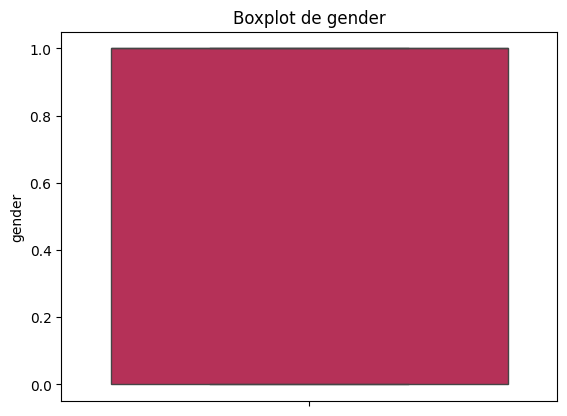

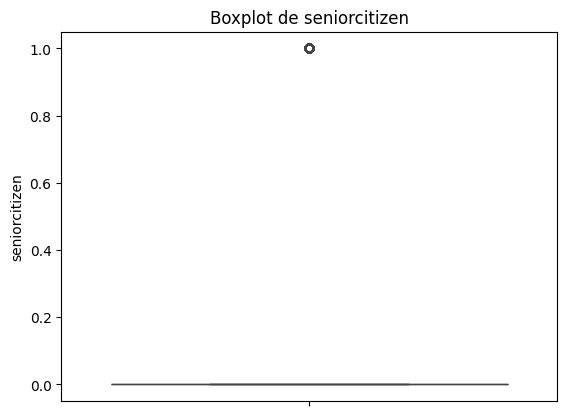

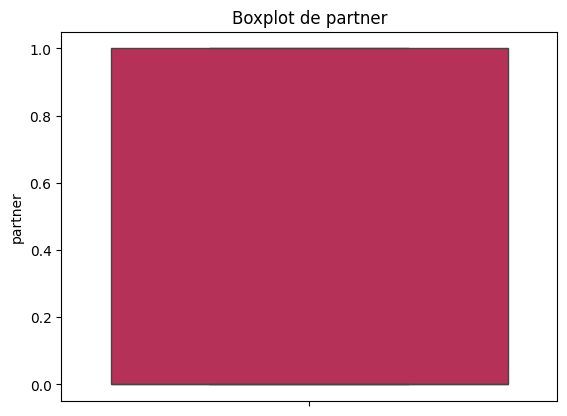

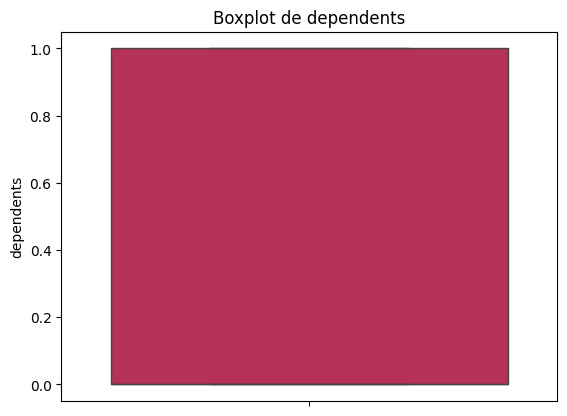

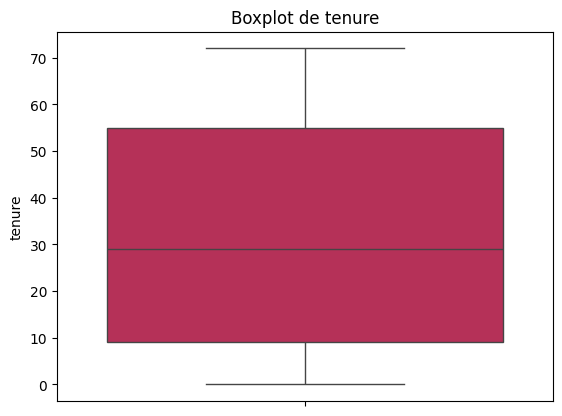

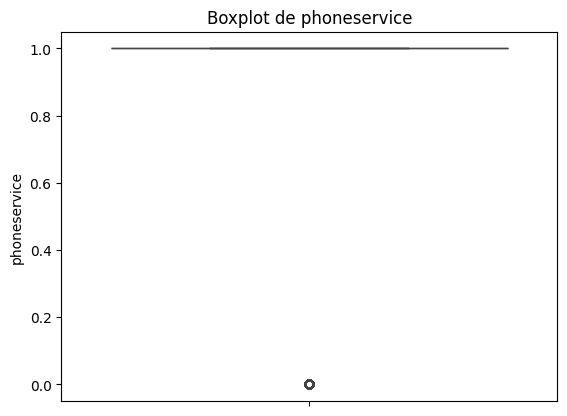

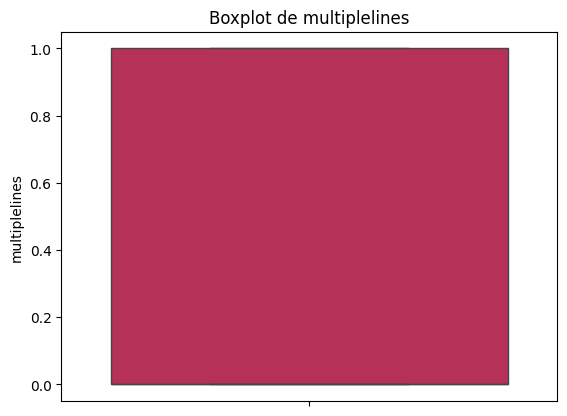

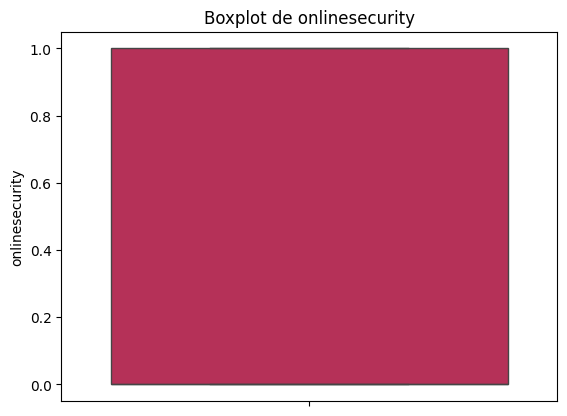

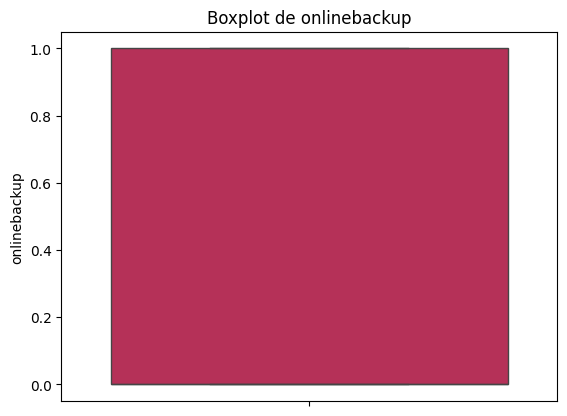

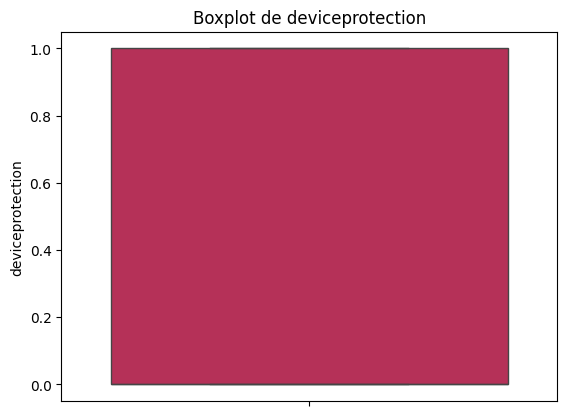

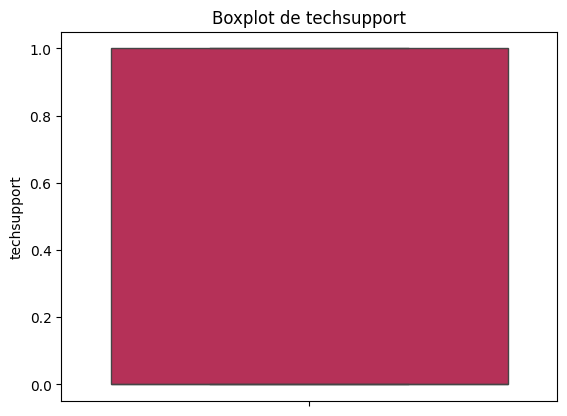

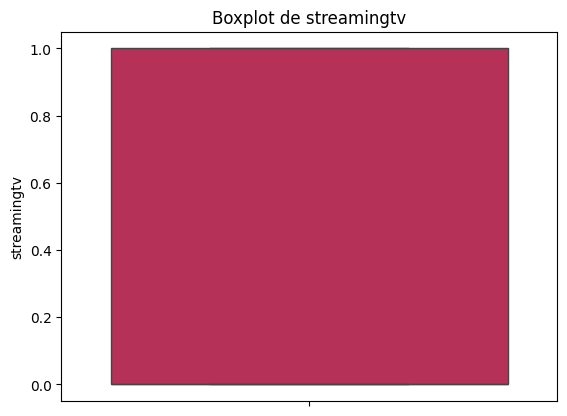

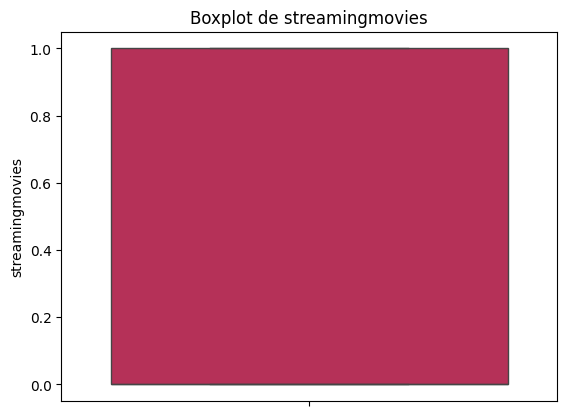

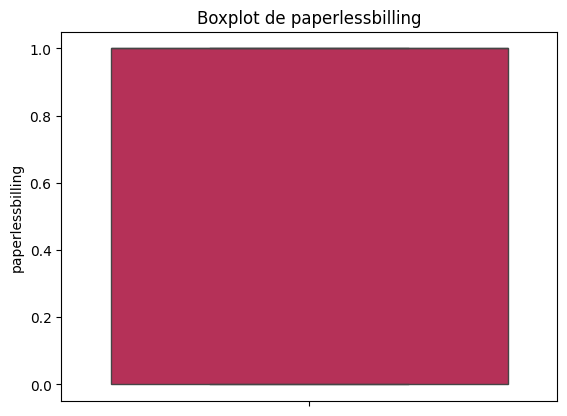

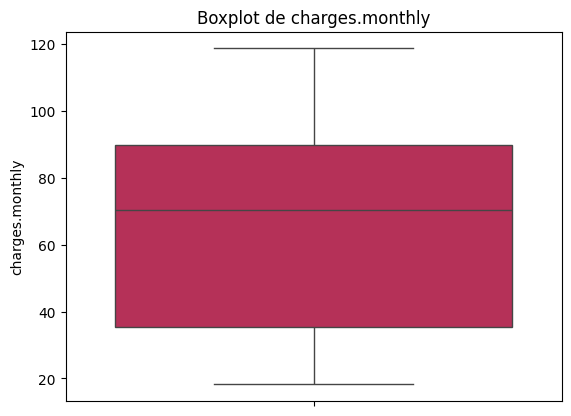

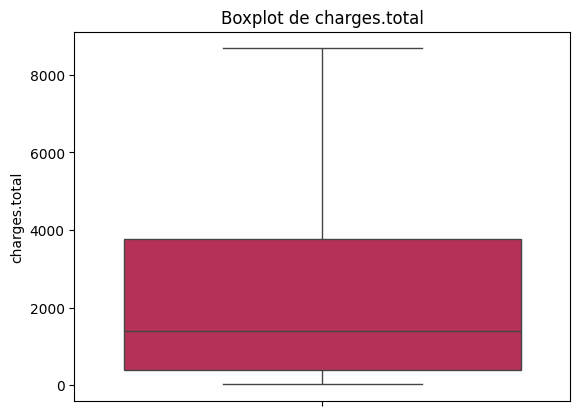

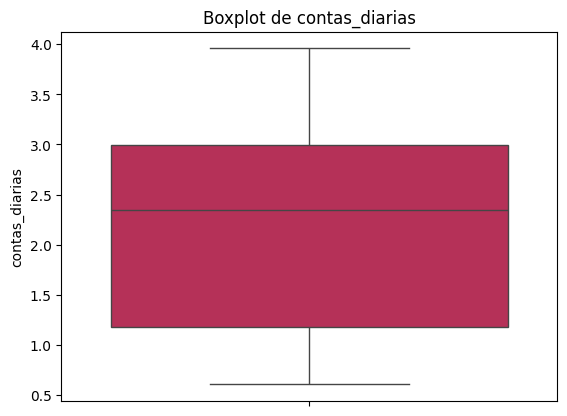

gender: 0 outliers
seniorcitizen: 1182 outliers
partner: 0 outliers
dependents: 0 outliers
tenure: 0 outliers
phoneservice: 707 outliers
multiplelines: 0 outliers
onlinesecurity: 0 outliers
onlinebackup: 0 outliers
deviceprotection: 0 outliers
techsupport: 0 outliers
streamingtv: 0 outliers
streamingmovies: 0 outliers
paperlessbilling: 0 outliers
charges.monthly: 0 outliers
charges.total: 0 outliers
contas_diarias: 0 outliers


In [49]:
# Remover colunas irrelevantes
if 'customerid' in df.columns:
    df = df.drop('customerid', axis=1)

# Encoding de variáveis categóricas
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Garantir que colunas de dummies são int
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)

# Outliers
for col in num_cols:
    sns.boxplot(df[col], palette='rocket')
    plt.title(f'Boxplot de {col}')
    plt.show()

# Detectar valores extremos (exemplo)
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
    print(f'{col}: {len(outliers)} outliers')

## 6. <a name="balanceamento"></a> Balanceamento das Classes

In [50]:
X = df.drop('churn', axis=1)
y = df['churn']

# Split mantendo proporção
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Teste diferentes técnicas de balanceamento
strategies = {
    "Original": (X_train, y_train),
    "SMOTE": SMOTE(random_state=42).fit_resample(X_train, y_train),
    "RandomUnderSampler": RandomUnderSampler(random_state=42).fit_resample(X_train, y_train),
    "SMOTEENN": SMOTEENN(random_state=42).fit_resample(X_train, y_train)
}

# Visualize proporções
for name, (Xb, yb) in strategies.items():
    print(f"{name}: {yb.value_counts(normalize=True)}")

Original: churn
0    0.742823
1    0.257177
Name: proportion, dtype: float64
SMOTE: churn
0    0.5
1    0.5
Name: proportion, dtype: float64
RandomUnderSampler: churn
0    0.5
1    0.5
Name: proportion, dtype: float64
SMOTEENN: churn
1    0.536568
0    0.463432
Name: proportion, dtype: float64


## 7. <a name="modelagem"></a> Modelagem Preditiva

In [51]:
# Separação dos tipos de colunas (exemplo, ajuste conforme necessário)
numeric_cols = X_train.columns[X_train.dtypes != 'uint8']
categorical_cols = X_train.columns[X_train.dtypes == 'uint8']

# Pré-processamento
numeric_transformer = Pipeline([('scaler', StandardScaler())])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    # ('cat', 'passthrough', categorical_cols)  # já está em dummies
])

# Pipelines
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    # "XGBoost": XGBClassifier(random_state=42), # Se desejar
}

results = {}

for balance_name, (Xb, yb) in strategies.items():
    for model_name, model in models.items():
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        scores = cross_val_score(pipe, Xb, yb, cv=5, scoring='f1')
        print(f"{model_name} + {balance_name}: F1 média={scores.mean():.3f} desvio={scores.std():.3f}")

Logistic Regression + Original: F1 média=0.581 desvio=0.021
Random Forest + Original: F1 média=0.529 desvio=0.020
Logistic Regression + SMOTE: F1 média=0.800 desvio=0.105
Random Forest + SMOTE: F1 média=0.830 desvio=0.089
Logistic Regression + RandomUnderSampler: F1 média=0.759 desvio=0.018
Random Forest + RandomUnderSampler: F1 média=0.735 desvio=0.020
Logistic Regression + SMOTEENN: F1 média=0.928 desvio=0.028
Random Forest + SMOTEENN: F1 média=0.946 desvio=0.015


## 8. <a name="avaliacao"></a> Avaliação de Modelos

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1620
           1       0.54      0.56      0.55       561

    accuracy                           0.76      2181
   macro avg       0.69      0.70      0.69      2181
weighted avg       0.77      0.76      0.76      2181



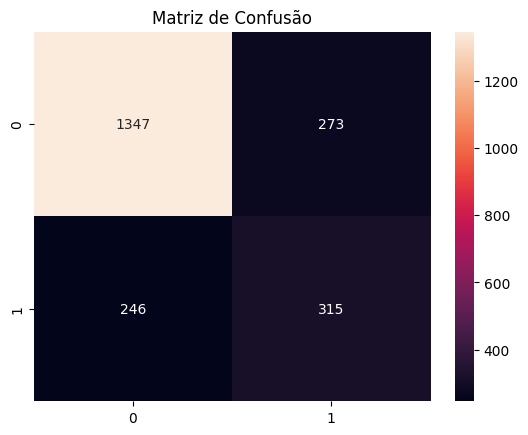

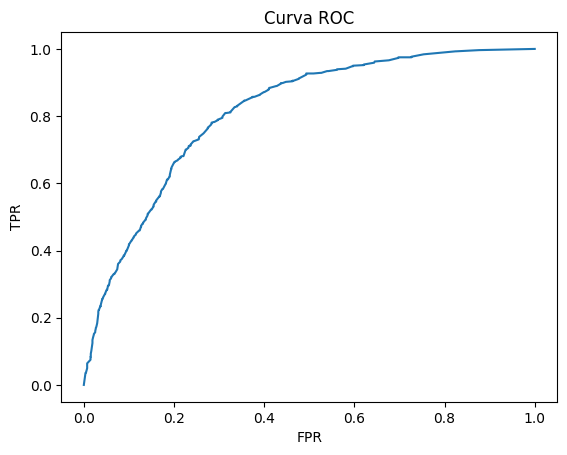

AUC: 0.8118395281793974


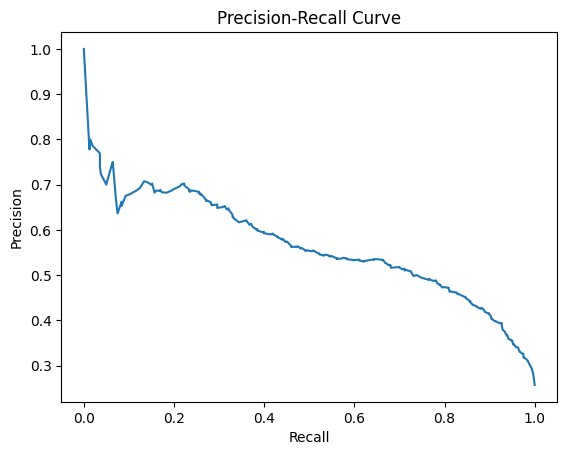

In [52]:
# Exemplo com RandomForest e SMOTE
final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
final_pipe.fit(strategies['SMOTE'][0], strategies['SMOTE'][1])
y_pred = final_pipe.predict(X_test)
y_proba = final_pipe.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Matriz de Confusão')
plt.show()

# ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.title('Curva ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print('AUC:', roc_auc_score(y_test, y_proba))

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### 8.1 Avaliando com thresholds diferentes:

In [53]:
for thresh in np.arange(0.3, 0.8, 0.1):
    y_pred_thresh = (y_proba >= thresh).astype(int)
    print(f"Threshold={thresh:.2f}")
    print(classification_report(y_test, y_pred_thresh))

Threshold=0.30
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1620
           1       0.47      0.80      0.59       561

    accuracy                           0.72      2181
   macro avg       0.69      0.74      0.69      2181
weighted avg       0.80      0.72      0.74      2181

Threshold=0.40
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1620
           1       0.52      0.70      0.60       561

    accuracy                           0.76      2181
   macro avg       0.70      0.74      0.71      2181
weighted avg       0.79      0.76      0.77      2181

Threshold=0.50
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1620
           1       0.54      0.57      0.55       561

    accuracy                           0.76      2181
   macro avg       0.69      0.70      0.70      2181
weighted avg       0.77      

## 9. <a name="interpretacao"></a> Interpretação e Explicabilidade

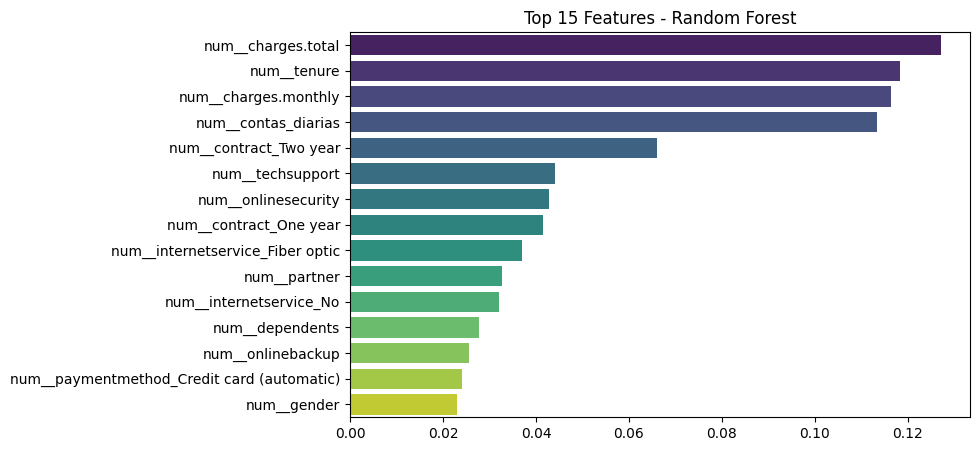

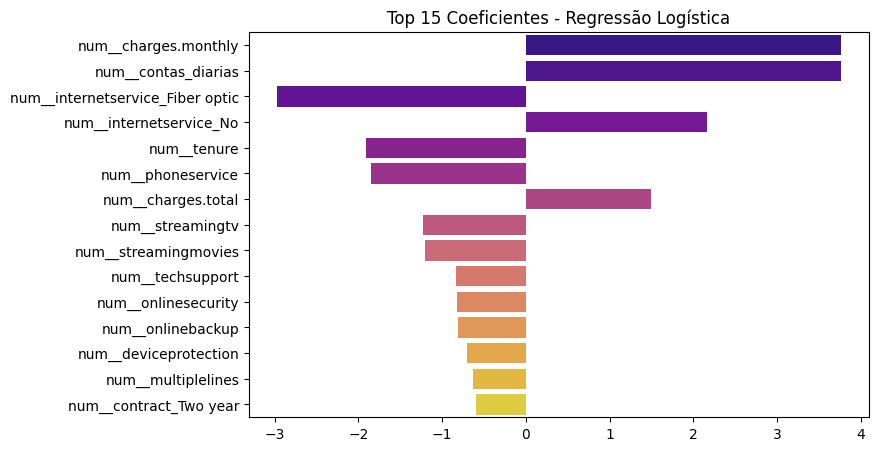

Shape of shap_values: (2181, 24, 2)
Shape of transformed_X_test_df: (2181, 24)


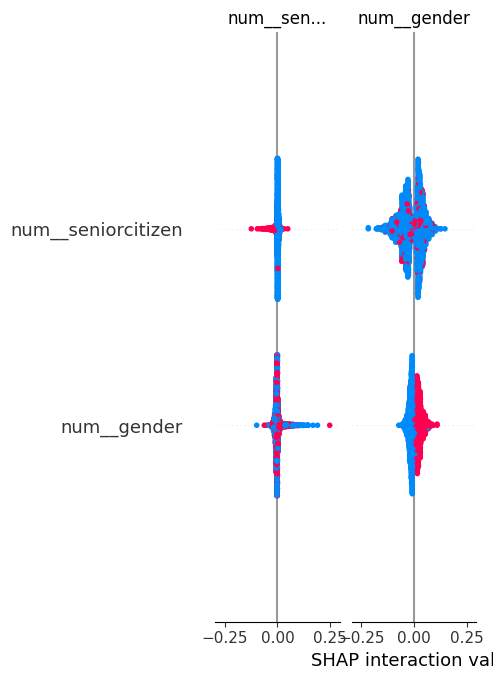

In [54]:
# Importância das features para Random Forest
importances = final_pipe.named_steps['classifier'].feature_importances_

# Ajustar o pré-processador separadamente para obter os nomes das features após a transformação
fitted_preprocessor = preprocessor.fit(X_train)
processed_feature_names = fitted_preprocessor.get_feature_names_out(X_train.columns)


idx = np.argsort(importances)[::-1][:15]
plt.figure(figsize=(8,5))
# Usar as importâncias e os nomes das features processadas
sns.barplot(x=importances[idx], y=processed_feature_names[idx], palette='viridis')
plt.title('Top 15 Features - Random Forest')
plt.show()

# Regressão Logística - Coeficientes
if 'Logistic Regression' in models:
    lr_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    lr_pipe.fit(strategies['SMOTE'][0], strategies['SMOTE'][1])
    coef = lr_pipe.named_steps['classifier'].coef_[0]
    # Usar os nomes das features processadas obtidos do pré-processador ajustado
    idx = np.argsort(np.abs(coef))[::-1][:15]
    plt.figure(figsize=(8,5))
    # Usar os coeficientes e os nomes das features processadas
    sns.barplot(x=coef[idx], y=processed_feature_names[idx], palette='plasma')
    plt.title('Top 15 Coeficientes - Regressão Logística')
    plt.show()

# SHAP para interpretabilidade local/global
explainer = shap.TreeExplainer(final_pipe.named_steps['classifier'])
# Usar os dados de teste transformados para os valores SHAP e features
transformed_X_test = fitted_preprocessor.transform(X_test)

# Converter transformed_X_test de volta para um DataFrame com os nomes corretos das features
transformed_X_test_df = pd.DataFrame(transformed_X_test, columns=processed_feature_names)

# Calcular os valores SHAP usando a sintaxe explainer(...) e obter o atributo values
shap_values = explainer(transformed_X_test_df).values

print("Shape of shap_values:", shap_values.shape)
print("Shape of transformed_X_test_df:", transformed_X_test_df.shape)

# Usar o DataFrame de dados de teste transformados e os nomes das features processadas para o summary_plot
# Passar os shap_values diretamente, não shap_values[1]
shap.summary_plot(shap_values, features=transformed_X_test_df, feature_names=processed_feature_names)

## 10. <a name="exportacao"></a> Exportação de Resultados e Salvamento de Modelos

In [55]:
# Salvando previsões com probabilidade
resultados = X_test.copy()
resultados['churn_real'] = y_test.values
resultados['churn_predito'] = y_pred
resultados['prob_churn'] = y_proba
resultados.to_csv('previsoes_churn.csv', index=False)

# Salvando o modelo
with open('modelo_random_forest.pkl', 'wb') as f:
    pickle.dump(final_pipe, f)

## 11. <a name="conclusao"></a> Conclusão e Recomendações

# Análise de Evasão de Clientes - Telecom X

## 1. Introdução

Este relatório apresenta os resultados da análise exploratória, pré-processamento, modelagem preditiva e interpretação de dados de clientes da Telecom X com o objetivo de identificar os principais fatores que influenciam a evasão (churn) e desenvolver modelos capazes de prever quais clientes têm maior probabilidade de cancelar seus serviços. A antecipação da evasão é crucial para que a empresa possa implementar estratégias de retenção direcionadas.

## 2. Principais Fatores de Evasão

A análise da importância das features dos modelos de Machine Learning e a interpretação utilizando SHAP revelaram diversas variáveis com impacto significativo na probabilidade de um cliente evadir. Os fatores mais influentes identificados incluem:

*   **Tempo de Contrato (Tenure):** Clientes com menor tempo de contrato (tenure) apresentam maior propensão à evasão. A duração do relacionamento com a empresa é um fator crítico.
*   **Encargos Mensais (Charges.monthly) e Encargos Totais (Charges.total):** Valores mais altos de encargos mensais e totais estão associados a uma maior probabilidade de churn. Isso pode indicar insatisfação com o custo do serviço em relação ao valor percebido.
*   **Tipo de Contrato:** Clientes com contratos de dois anos ou um ano demonstram menor probabilidade de evasão em comparação com aqueles em contratos mensais. Contratos de longo prazo indicam maior fidelidade.
*   **Serviço de Internet (Fiber Optic):** A presença do serviço de internet Fibra Óptica foi identificada como um fator que aumenta a probabilidade de churn. Isso pode estar relacionado a problemas de qualidade do serviço ou a uma maior sensibilidade ao preço para este tipo de conexão.
*   **Serviços de Segurança e Suporte (TechSupport, OnlineSecurity, OnlineBackup):** A adesão a serviços adicionais como Suporte Técnico, Segurança Online e Backup Online está associada a uma menor probabilidade de evasão. Clientes com esses serviços tendem a ser mais engajados e satisfeitos.
*   **Método de Pagamento (Electronic check e Mailed check):** O método de pagamento "Cheque Eletrônico" demonstrou aumentar a probabilidade de churn, enquanto o "Cheque Enviado" parece estar associado a uma menor probabilidade. Isso pode refletir diferentes perfis de clientes ou problemas específicos com o método de pagamento eletrônico.
*   **Contas Diárias (contas_diarias):** Esta variável, derivada dos encargos, também se mostrou relevante, indicando que a frequência e o valor dos encargos impactam a decisão de evasão.

## 3. Desempenho dos Modelos Preditivos

Foram avaliados modelos de Regressão Logística e Random Forest, aplicando diferentes estratégias de balanceamento de classes (Original, SMOTE, RandomUnderSampler, SMOTEENN) para lidar com a distribuição desigual da variável alvo (churn). O desempenho dos modelos foi avaliado utilizando F1-score (média em validação cruzada no conjunto de treino balanceado e no conjunto de teste não balanceado para a classe de churn) e AUC (no conjunto de teste não balanceado).

| Estratégia de Balanceamento | Modelo              | F1 CV (Média) | F1 Teste (Churn) | AUC Teste |
|-----------------------------|---------------------|---------------|------------------|-----------|
| Original                    | Regressão Logística | 0.581         | 0.621            | 0.843     |
| Original                    | Random Forest       | 0.529         | 0.555            | 0.812     |
| SMOTE                       | Regressão Logística | 0.800         | 0.550            | 0.831     |
| SMOTE                       | Random Forest       | 0.830         | 0.555            | 0.812     |
| RandomUnderSampler          | Regressão Logística | 0.759         | 0.619            | 0.843     |
| RandomUnderSampler          | Random Forest       | 0.735         | 0.604            | 0.814     |
| SMOTEENN                    | Regressão Logística | 0.928         | 0.603            | 0.836     |
| SMOTEENN                    | Random Forest       | 0.946         | 0.620            | 0.833     |

Os resultados indicam que as estratégias de balanceamento (especialmente SMOTEENN) melhoraram significativamente o F1-score na validação cruzada nos conjuntos de treino balanceados. No entanto, ao avaliar no conjunto de teste não balanceado, a melhora no F1-score para a classe de churn foi mais modesta e variada entre as técnicas. O AUC, que é menos sensível ao desbalanceamento, permaneceu relativamente consistente entre as estratégias de balanceamento para o mesmo modelo.

Considerando o F1-score para a classe de churn no conjunto de teste (que é a métrica mais relevante para identificar corretamente os clientes que irão evadir), os modelos treinados com a estratégia Original e RandomUnderSampler para Regressão Logística, e SMOTEENN para Random Forest apresentaram resultados comparáveis. A escolha final do modelo e estratégia dependerá da ponderação entre precisão e recall para a classe de churn, o que pode ser ajustado através do threshold de classificação.


## 4. Estratégias de Retenção Propostas

Com base nos principais fatores de evasão identificados, as seguintes estratégias de retenção são propostas para a Telecom X:

*   **Clientes com Baixo Tempo de Contrato (Tenure):**
    *   Implementar programas de boas-vindas robustos e acompanhamento proativo nos primeiros meses de serviço para garantir a satisfação e resolver quaisquer problemas iniciais rapidamente.
    *   Oferecer incentivos (descontos, benefícios adicionais) para clientes que demonstrarem intenção de cancelar ou que se aproximam do final de contratos de curto prazo, visando a renovação para períodos mais longos.
    *   Melhorar a experiência do cliente desde o onboarding para criar um vínculo mais forte desde o início.

*   **Clientes com Altos Encargos Mensais e Totais:**
    *   Analisar o uso do serviço por clientes com altos encargos para identificar se os planos atuais atendem às suas necessidades ou se há opções mais adequadas e de menor custo disponíveis.
    *   Comunicar claramente o valor dos serviços e os benefícios incluídos nos pacotes de maior custo.
    *   Oferecer negociação de planos ou pacotes com preços mais competitivos para clientes de alto gasto que apresentarem risco de evasão.

*   **Clientes com Contratos Mensais:**
    *   Incentivar a migração de clientes de contratos mensais para contratos de um ou dois anos, oferecendo descontos significativos, bônus ou benefícios adicionais exclusivos para contratos de longo prazo.
    *   Destacar a estabilidade de preço e os benefícios de longo prazo associados a contratos mais longos.

*   **Clientes com Serviço de Internet Fibra Óptica:**
    *   Investigar as causas da maior propensão à evasão entre usuários de Fibra Óptica. Isso pode envolver pesquisas de satisfação, análise de tickets de suporte ou monitoramento da qualidade do serviço nesta modalidade.
    *   Abordar proativamente quaisquer problemas de serviço ou preocupações de custo identificadas para este segmento.
    *   Considerar programas de fidelidade ou benefícios específicos para clientes de Fibra Óptica de longo prazo.

*   **Clientes sem Serviços de Segurança e Suporte:**
    *   Promover ativamente os benefícios dos serviços adicionais como Suporte Técnico, Segurança Online e Backup Online durante o ciclo de vida do cliente, não apenas no momento da contratação inicial.
    *   Considerar a inclusão desses serviços em pacotes premium ou oferecer períodos de teste gratuitos para demonstrar seu valor.

*   **Clientes que Utilizam Cheque Eletrônico:**
    *   Investigar as possíveis razões pelas quais o método de pagamento "Cheque Eletrônico" está associado a uma maior evasão. Pode haver problemas de usabilidade, segurança percebida ou taxas associadas.
    *   Oferecer suporte e educação sobre o uso do Cheque Eletrônico ou incentivar a adoção de outros métodos de pagamento com menor associação ao churn, destacando suas vantagens.

*   **Clientes com Altas Contas Diárias:**
    *   Monitorar clientes com picos ou altas contas diárias e fornecer alertas ou opções de gerenciamento de uso para evitar surpresas desagradáveis que possam levar à insatisfação e evasão.

A implementação dessas estratégias de forma direcionada, utilizando os modelos preditivos para identificar clientes em risco, pode ser fundamental para reduzir a taxa de churn na Telecom X.


Summary:

**Fatores de Evasão**: Os fatores mais influentes na evasão de clientes incluem:
- menor tempo de contrato, -encargos mensais e totais mais altos, -contratos mensais (em oposição a contratos de um ou dois anos), -serviço de internet fibra óptica, -ausência de serviços adicionais como suporte técnico, -segurança online e backup online, -método de pagamento cheque eletrônico e altas "contas diárias".

**Desempenho do Modelo:** A Regressão Logística e o Random Forest foram avaliados com diferentes estratégias de balanceamento. As estratégias de balanceamento melhoraram o F1-score em validação cruzada nos dados de treino balanceados, mas o impacto no F1-score para a classe de evasão no conjunto de teste não balanceado foi variado. A estratégia Original e RandomUnderSampler para Regressão Logística, e SMOTEENN para Random Forest, apresentaram os melhores resultados de F1-score para a classe de evasão no conjunto de teste. O AUC no conjunto de teste foi relativamente consistente entre as estratégias para cada modelo.

**Estratégias de Retenção Propostas:**
Foram propostas estratégias de retenção específicas para cada fator de evasão identificado, como:
- programas de boas-vindas para novos clientes,
- análise de planos para clientes com altos encargos,
- incentivos para contratos de longo prazo,
- investigação de problemas com fibra óptica,
- promoção de serviços adicionais e
- análise de problemas com o método de pagamento cheque eletrônico.
**Insights ou próximos passos**
1. Implementar as estratégias de retenção propostas, priorizando aquelas direcionadas aos fatores de maior impacto, e monitorar seu efeito na taxa de evasão.
2. Utilizar o modelo preditivo com melhor desempenho (considerando o F1-score na classe de evasão no conjunto de teste) para identificar proativamente clientes em risco e aplicar as estratégias de retenção de forma direcionada.